# Alexander Fabiano
# HW 5

## Topic: Dimensionality Reduction and Clustering

For this homework we will be using some image data! Specifically, the MNIST data set. You can load this data easily with the following commands:

In [1]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

### Assignment Description

The MNIST data set is hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

Source: https://www.kaggle.com/c/digit-recognizer/data

For this homework, perform the following with the MNIST data:

1. Use PCA to reduce the dimensionality

    a. How many components did you use? Why?
    
    b. Plot the first two components. Do you notice any trends? What is this plot showing us?
    
    c. Why would you use PCA? What is it doing? And what are the drawbacks?
    
    d. Plot some of the images, then compress them using PCA and plot again. How does it look?
    
2. Use t-SNE to plot the first two components (you should probably random sample around 10000 points):

    a. How does this plot differ from your PCA plot?
    
    b. How robust is it to changes in perplexity?
    
    c. How robust is it to different learning rate and number of iterations?
    
3. Perform k-means clustering:

    a. How did you choose k?
    
    b. How did you evaluate your clustering?
    
    c. Visualize your clusters using t-sne
    
    d. Did you scale your data?
    
    e. How robust is your clustering?
    
4. Perform hierarchical clustering:

    a. Plot your dendrogram
    
    b. How many clusters seem reasonable based off your graph?
    
    c. How does your dendrogram change with different linkage methods?

### Grading

This homework is due **March 22, 2018 by midnight Utah time.** By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

Rubric:

* Code Quality - 10%
* Storytelling - 10%
* PCA - 20%
* T-SNE - 20%
* K-means - 20%
* Hierarchical Clustering - 20%

**Import Statements**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.cluster import homogeneity_score, silhouette_score
from sklearn.utils import shuffle

## Introduction

This assignment involves using the MNIST data set, which is a compilation of 70,000 handwritten digits zero through nine. While previous homeworks have dealt with prediction, this project works with classification. For this assignment, I will use both principle component analysis and k-means classification methods.

## 1. Principle Component Analysis 

Principal component analysis, or PCA, is used for data dimensionality reduction. PCA works by extracting the eigenvectors from the singular value decomposition of the data matrix; thus, each component will be orthogonal to the others. This method maximizes the amount of data variance, or information, for each iteration. 

In [3]:
pca = PCA() # Initialize pca class
X_pca = pca.fit_transform(X) # Fit pca to all data
print(X_pca.shape)

(70000, 784)


In [4]:
pca = PCA(n_components=0.95) # Find the minimum number of components needed to explain 95% of the variance 
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(70000, 154)


### a. How many components did you use? Why?

I chose to use 154 components. While this number may seem arbitrary, I want my model to explain at least 95% of the variance in the data, so I found the minimum number of components whose cumulative sum is greater than or equal to 0.95.

Text(0.5,1,'Cumulative Sum of Explained Variance')

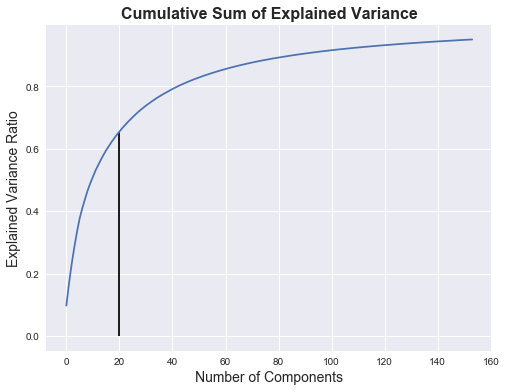

In [5]:
cum_ratio = np.cumsum(pca.explained_variance_ratio_) # Sums the explained variance ratio by number of components
plt.figure(figsize=(8,6))
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[20],x=20)
plt.xlabel("Number of Components", fontsize=14)
plt.ylabel("Explained Variance Ratio", fontsize=14)
plt.title("Cumulative Sum of Explained Variance", fontsize=16, fontweight='bold')

### b. Plot the first two components. Do you notice any trends? What is this plot showing us?

From the scatter plot of the first two components, I cannot discern any pattern or trend. It appears there is no relationship between the first and second principle components. This is to be expected because a relationship between the first two components would indicate the presence of other confounding factors or dependencies amongst the data.

Text(0.5,1,'PCA 1 & 2')

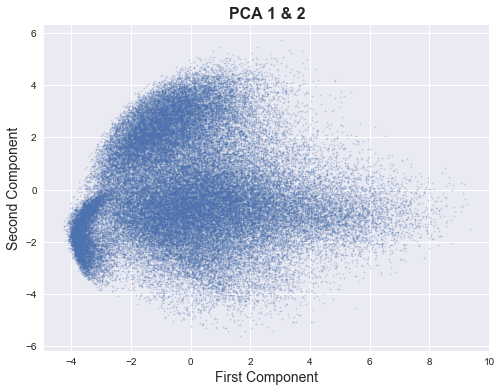

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1], alpha=.25, marker='h', s=2)# 'Alpha' changes opacity and 'marker' set to hexagons
plt.xlabel("First Component", fontsize=14)
plt.ylabel("Second Component", fontsize=14)
plt.title("PCA 1 & 2", fontsize=16, fontweight='bold')

### c. Why would you use PCA? What is it doing? And what are the drawbacks?

Principle component analysis is used to reduce high dimension data. PCA calculates the orthogonal eigenvectors from the matrix AA', which are derived from the singular value decomposition of a matrix A. In other words, PCA takes high dimension data and projects it down to lower dimensions while maximizing the variance of the data for each component. While this effectively reduces the dimensions of the data, PCA loses some information with each iteration. An illustration of this information loss as a result of PCA can be observed in the following section (d).

### d. Plot some of the images, then compress them using PCA and plot again. How does it look?

The original images, although reminiscent of pixelated Atari graphics, are relatively defined given the pixel density. However upon examing the reconstructed PCA images, one can see that these are much more blurry and the coloring is far less defined than their original counterparts. Areas of crisp blackness in the original numbers become blurred into adjacent grey and white pixels in the reconstructed images. This is a result of the information loss from PCA dimensionality reduction.

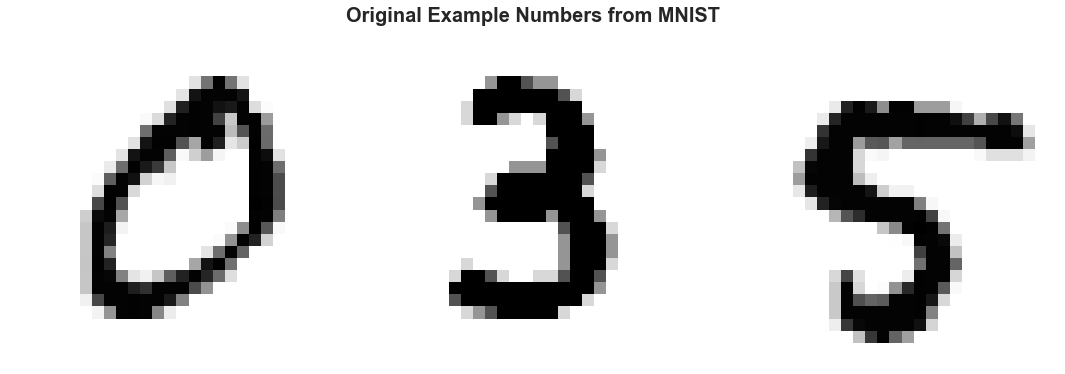

In [7]:
plt.figure(figsize=(15,5)) # Sets overall figure size
plt.suptitle("Original Example Numbers from MNIST", fontsize=20, y=1.03, fontweight='bold')
plt.subplot(1,3,1) # Plot for row 1, column 1 of 3
plt.imshow(X[0].reshape((28,28)), cmap='Greys') # Shows first image in data set after reshaping
plt.xticks([]) # Turns off x and y tick marks
plt.yticks([])
plt.subplot(1,3,2) # Plot for row 1, column 2 of 3
plt.imshow(X[64000].reshape((28,28)), cmap='Greys') 
plt.xticks([])
plt.yticks([])
plt.subplot(1,3,3) # Plot for row 1, column 3 of 3
plt.imshow(X[33000].reshape((28,28)), cmap='Greys')
plt.xticks([])
plt.yticks([])
plt.tight_layout()

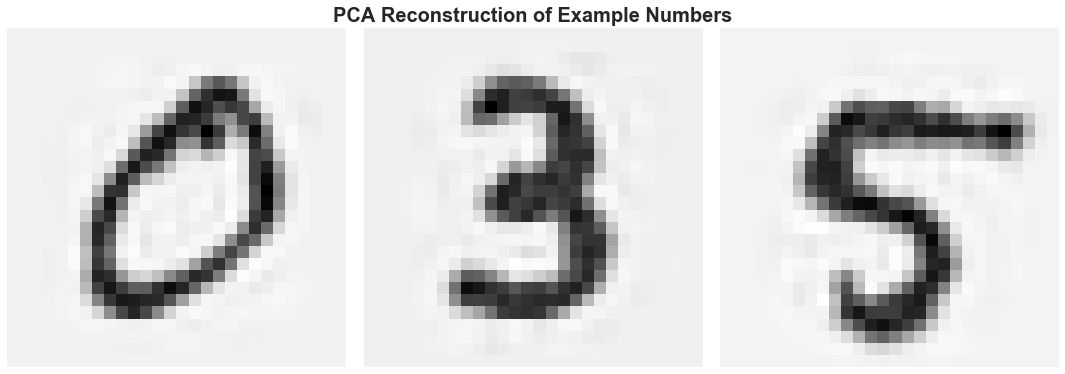

In [8]:
plt.figure(figsize=(15,5))
plt.suptitle("PCA Reconstruction of Example Numbers", fontsize=20, y=1.03, fontweight='bold')
plt.subplot(1,3,1)
plt.imshow(pca.inverse_transform(X_pca[0]).reshape((28,28)), cmap='Greys')
plt.xticks([])
plt.yticks([])
plt.subplot(1,3,2)
plt.imshow(pca.inverse_transform(X_pca[64000]).reshape((28,28)), cmap='Greys')
plt.xticks([])
plt.yticks([])
plt.subplot(1,3,3)
plt.imshow(pca.inverse_transform(X_pca[33000]).reshape((28,28)), cmap='Greys')
plt.xticks([])
plt.yticks([])
plt.tight_layout()

## 2. T-Distributed Stochastic Neighbor Embedding (T-SNE)

T-SNE is a type of dimensionality reduction machine learning algorithm. It projects high dimension pairwise probability distributions into similar distributions for lower dimensions (usually 2 or 3 dimensions). This means that nodes/observations that are similar in n-dimensions should also be similar in 2 or 3 dimensions.

In [9]:
rows = np.arange(70000) # Returns integer interval up to 70,000 to be used in selecting rows by their indices
np.random.shuffle(rows) # Randomly shuffles all 70,000 numbers
n_select = 10000 # Selects the first 10,000 of the 70,000 digit images

In [10]:
# This function creates t-sne objects and takes three arguments: perplexity, # of iterations, and learning rate
def create_tsne(perplexity, n_iter, learning_rate):
    tsne = TSNE(n_components=2, verbose=0, perplexity=perplexity, n_iter=n_iter, learning_rate=learning_rate)
    return tsne.fit_transform(X_pca[rows[:n_select],:]) # Returns np array of dim=2

In [11]:
df_tsne = pd.DataFrame(create_tsne(50,1000,200), columns=['Component_1', 'Component_2']) # Creates dataframe from tsne
df_tsne['label'] = y[rows[:n_select]] # Adds 'labels' col to df_tsne & sets equal to the randomly selected rows in y

Text(0.5,1,'T-SNE Components 1 & 2\n$\\it{original}$ $\\it{perplexity(50)}$')

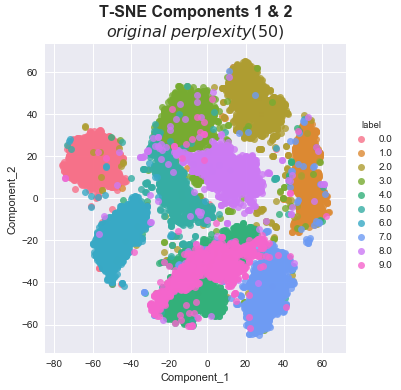

In [12]:
plt.figure(figsize=(8,6))
sns.lmplot(x='Component_1', y='Component_2', data=df_tsne, hue='label', fit_reg=False) # Plots 1st 2 comps. of tsne
plt.title("T-SNE Components 1 & 2\n$\it{original}$ $\it{perplexity(50)}$", fontsize=16, fontweight='bold')

### a. How does this plot differ from your PCA plot?

The PCA plot merely shows the first component against the second component; since orthogonality is the only relationship between the first two components, the PCA plot does not reveal any trends. On the other hand, T-SNE preserves the original relationships among the data using conditional probabilities as it projects the data into lower dimensions. Thus, we are able to see patterns in the data. From the illustration above, one can observe that T-SNE identifies the 10 numeric classes in the MNIST dataset.

### b. How robust is T-SNE to changes in perplexity?

Below are two plots with different perplexity specifications, 75 and 25 respectively. Although T-SNE does not preserve orientation, it can be clearly seen from the illustrations that the clusters change size and shape when perplexity changes. Hence, T-SNE is not very robust to changes in perplexity.

In [13]:
df_tsne2 = pd.DataFrame(create_tsne(75,1000,200), columns=['Component 1', 'Component 2'])
df_tsne2['label'] = y[rows[:n_select]]

In [14]:
df_tsne3 = pd.DataFrame(create_tsne(25,1000,200), columns=['Component 1', 'Component 2'])
df_tsne3['label'] = y[rows[:n_select]]

Text(0.5,1,'T-SNE Components 1 & 2\n$\\it{perplexity}$ $\\it{increase(75)}$')

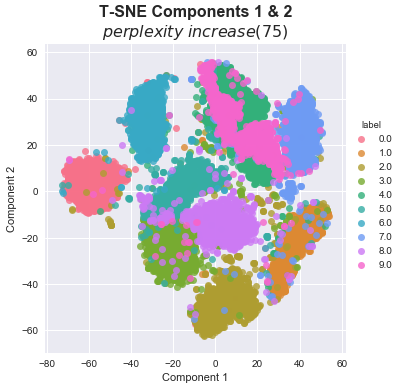

In [15]:
sns.lmplot(x='Component 1', y='Component 2', data=df_tsne2, hue='label', fit_reg=False)
plt.title("T-SNE Components 1 & 2\n$\it{perplexity}$ $\it{increase(75)}$", fontsize=16, fontweight='bold')

Text(0.5,1,'T-SNE Components 1 & 2\n$\\it{perplexity}$ $\\it{decrease(25)}$')

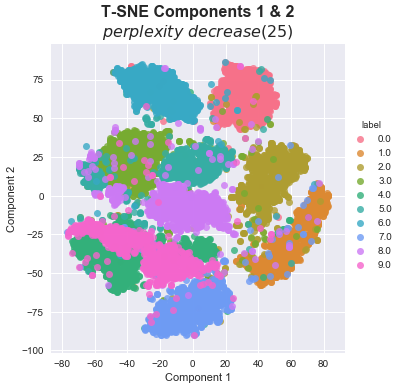

In [16]:
sns.lmplot(x='Component 1', y='Component 2', data=df_tsne3, hue='label', fit_reg=False)
plt.title("T-SNE Components 1 & 2\n$\it{perplexity}$ $\it{decrease(25)}$", fontsize=16, fontweight='bold')

### c. How robust is T-SNE to different learning rate and number of iterations?

T-SNE is also sensitive to changes in the number of iterations and the learning rate. In fact, T-SNE is arguably more sensitive to changes in iterations and learning rate than perplexity. The graphs below show that the classes change shape more dramatically than when perplexity is changed.

In [17]:
df_tsne4 = pd.DataFrame(create_tsne(50,1500,200), columns=['Component 1', 'Component 2']) # Increase iterations
df_tsne4['label'] = y[rows[:n_select]]

In [18]:
df_tsne5 = pd.DataFrame(create_tsne(50,500,200), columns=['Component 1', 'Component 2']) # Decrease iterations
df_tsne5['label'] = y[rows[:n_select]]

In [19]:
df_tsne6 = pd.DataFrame(create_tsne(50,1000,300), columns=['Component 1', 'Component 2']) # Increase learning rate
df_tsne6['label'] = y[rows[:n_select]]

In [20]:
df_tsne7 = pd.DataFrame(create_tsne(50,1000,100), columns=['Component 1', 'Component 2']) # Decrease learning rate
df_tsne7['label'] = y[rows[:n_select]]

Text(0.5,1,'T-SNE Components 1 & 2\n$\\it{n_iter}$ $\\it{increase(1500)}$')

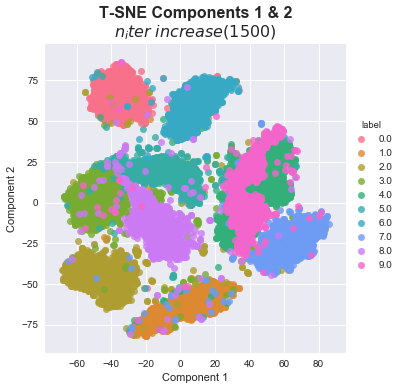

In [21]:
sns.lmplot(x='Component 1', y='Component 2', data=df_tsne4, hue='label', fit_reg=False)
plt.title("T-SNE Components 1 & 2\n$\it{n_iter}$ $\it{increase(1500)}$", fontsize=16, fontweight='bold')

Text(0.5,1,'T-SNE Components 1 & 2\n$\\it{n_iter}$ $\\it{decrease(500)}$')

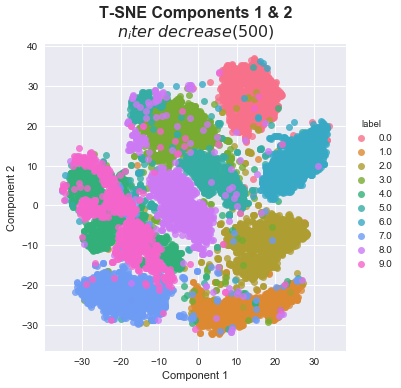

In [22]:
sns.lmplot(x='Component 1', y='Component 2', data=df_tsne5, hue='label', fit_reg=False)
plt.title("T-SNE Components 1 & 2\n$\it{n_iter}$ $\it{decrease(500)}$", fontsize=16, fontweight='bold')

Text(0.5,1,'T-SNE Components 1 & 2\n$\\it{learning_rate}$ $\\it{increase(300)}$')

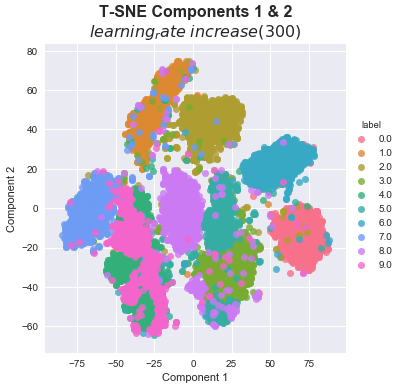

In [23]:
sns.lmplot(x='Component 1', y='Component 2', data=df_tsne6, hue='label', fit_reg=False)
plt.title("T-SNE Components 1 & 2\n$\it{learning_rate}$ $\it{increase(300)}$", fontsize=16, fontweight='bold')

Text(0.5,1,'T-SNE Components 1 & 2\n$\\it{learning_rate}$ $\\it{decrease(100)}$')

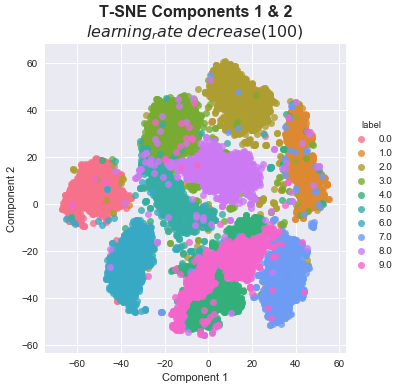

In [24]:
sns.lmplot(x='Component 1', y='Component 2', data=df_tsne7, hue='label', fit_reg=False)
plt.title("T-SNE Components 1 & 2\n$\it{learning_rate}$ $\it{decrease(100)}$", fontsize=16, fontweight='bold')

## 3. K-Means Clustering

### a. How did you choose k?

I chose k=10 because there are 10 classes in the MNIST dataset. Namely, the 10 classes are the digits 0 through 9.

In [40]:
kmeans = KMeans(n_clusters=10, n_init=20, n_jobs=1)
kmeans.fit(X[rows[:n_select],:]) # Fits kmeans to the 10,000 observation random sample defined earlier 
sk_clusters = kmeans.predict(X[rows[:n_select]]) # Predicts the class for the 10,000 observation random sample

### b. How did you evaluate your clustering?

I evaluated the k-means clustering using two methods, the homogeneity score and the silhouette score. The homogeneity score evaluates the amount of data points within a cluster that truly belong. In other words, it measures the amount of homogeneity within a given class. Homogeneity scores are between 0 and 1, with 1 being the best. The silhouette score calculates the Silhouette Coefficient for each observation. The Silhouette Coefficient is the ratio of the difference between the nearest cluster (excluding its own cluster) and the mean intra-cluster distance and the max of those two measures. A silhouette score of 1 is best and -1 is worst.

The homogeneity score for the k-means clustering algorithm indicates moderate accuracy since it is close to 0.5. The silhouette score is positive (which is good), but it is also close to zero. This means that there are overlapping clusters.

In [35]:
homogeneity_score(y[rows[:n_select]], kmeans.labels_)

0.49235536281983489

In [36]:
silhouette_score(X[rows[:n_select],:], kmeans.labels_, metric='euclidean')

0.059772629013086338

### c. Visualize your clusters using T-SNE

In [37]:
df_tsne['sk_clusters'] = sk_clusters

Text(0.5,1,'T-SNE Components 1 & 2\n$\\it{K-Means}$ $\\it{Clustering}$')

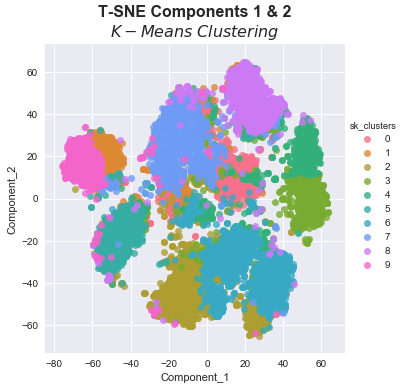

In [38]:
sns.lmplot(x='Component_1', y='Component_2', data=df_tsne, hue='sk_clusters', fit_reg=False)
plt.title("T-SNE Components 1 & 2\n$\it{K-Means}$ $\it{Clustering}$", fontsize=16, fontweight='bold')

### d. Did you scale your data?

I scaled the MNIST data when importing it by dividing by 255. I normalize by 1/255 since each pixel has a value between 0 and 255 when on a grey-scale. 

### e. How robust is your clustering?

My k-means clustering is less robust than the T-SNE algorithm since there is a fair amount of overlapping classes as illustrated by the muddled kindergarten splatter paint pattern.

## 4. Hierarchical Clustering

### a. Plot the dendrogram

In [30]:
x_shuf = shuffle(X, random_state=0) # Randomly shuffles the data
def create_dendrogram(linkage_method): # Defines function for creating dendrograms with key arg of linkage method
    Z = linkage(x_shuf[0:250], '{}'.format(linkage_method))
    _ = dendrogram(Z)
    return _

Text(0.5,1,'MNIST Dendrogram')

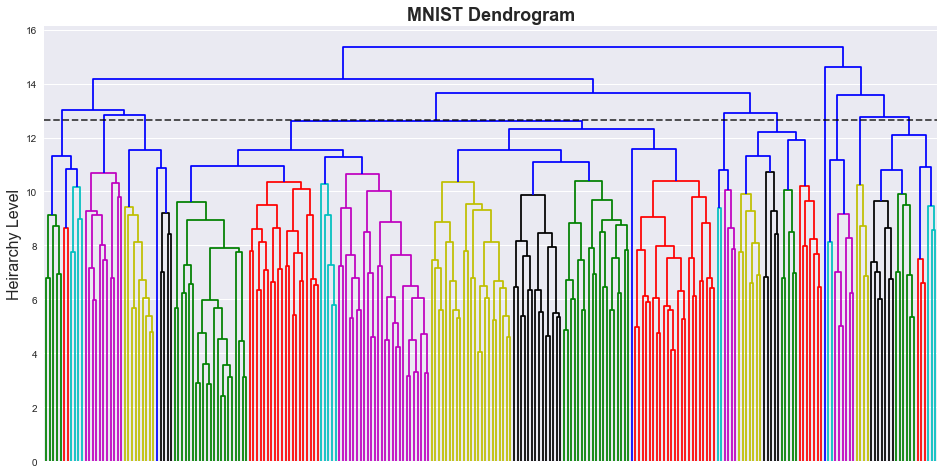

In [31]:
plt.figure(figsize=(16, 8))
create_dendrogram('complete') # Calls 'create_dendrogram' and passes in the 'complete' linkage method
plt.axhline(12.65, alpha=.75, c='k', linestyle='dashed')
plt.xticks([])
plt.ylabel("Heirarchy Level", fontsize=16)
plt.title("MNIST Dendrogram", fontsize=18, fontweight='bold')

### b. How many clusters seem reasonable based off your graph?

According to the above dendrogram, a reasonable amount of clusters would be somewhere between 6 and 11. This logically aligns with the MNIST dataset since there are 10 distinct classes, namely numbers 0-10.

### c. How does your dendrogram change with different linkage methods?

The dendrogram changes drastically with the various linkage methods. The linkage methods of 'ward' and 'complete' look the best because they achieve a fairly organized heirarchical structure. I tried other linkage methods such as 'single' and 'average', which were particularly uninformative.

Text(0.5,1,'MNIST Dendrogram')

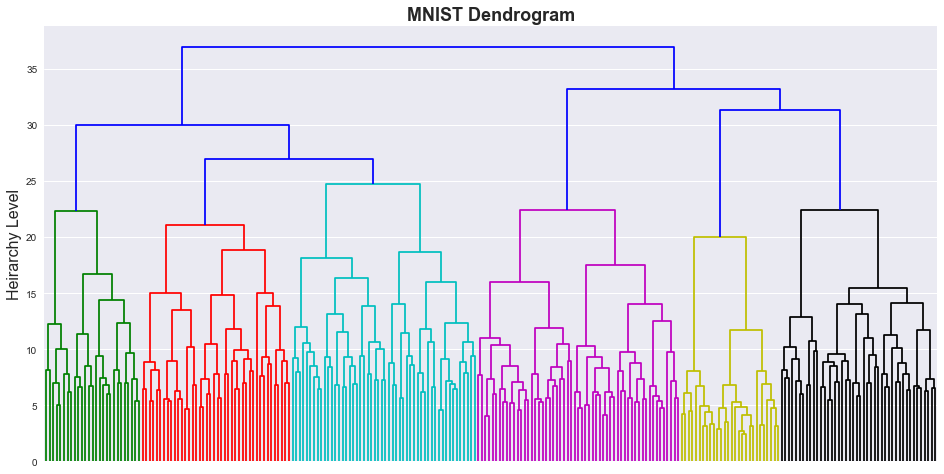

In [41]:
plt.figure(figsize=(16, 8))
create_dendrogram('ward')
plt.xticks([])
plt.ylabel("Heirarchy Level", fontsize=16)
plt.title("MNIST Dendrogram", fontsize=18, fontweight='bold')

Text(0.5,1,'MNIST Dendrogram')

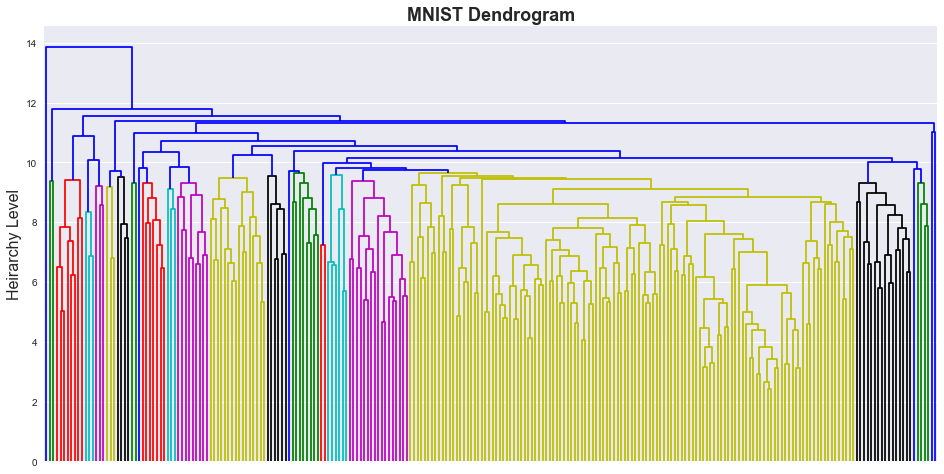

In [42]:
plt.figure(figsize=(16, 8))
create_dendrogram('average')
plt.xticks([])
plt.ylabel("Heirarchy Level", fontsize=16)
plt.title("MNIST Dendrogram", fontsize=18, fontweight='bold')